# Libraries

In [130]:
import pandas as pd
from feature_processing import extract_simple_features
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [26]:
data = pd.read_csv('./data/all_data.tsv', sep='\t')
json_data = data.to_dict('records')
df = extract_simple_features(json_data)
df_annotated = df[df['has_root_cause'].isin([0, 1])]
df_annotated.reset_index(inplace=True, drop=True)

In [19]:
df.head()

,question_id,answer_id,what_start,which_start,how_start,why_start,len_question,len_question_body,len_answer,nb_strong_tags_question,nb_code_tags_question,nb_href_tags_question,nb_hr_tags_question,nb_blockquote_tags_question,nb_strong_tags_answer,nb_code_tags_answer,nb_href_tags_answer,nb_hr_tags_answer,nb_blockquote_tags_answer,nb_return_carriage_question,nb_return_carriage_answer,answer_score,question_score,question_view,ratio_score1,ratio_score2,time_difference,has_root_cause
0,59347675,59348357,0,0,0,1,126,626,2462,0,1,1,0,0,0,16,0,0,0,20,70,0,0,71,0.0,0.0,5797,-1
1,59348401,59348777,1,0,0,0,63,191,1341,0,0,0,0,0,0,2,0,0,0,1,24,0,0,11,0.0,0.0,3508,-1
2,59348470,59348671,0,0,0,0,61,806,1030,0,3,0,0,0,0,3,1,0,0,24,32,0,-1,58,-0.0,0.0,1907,-1
3,59348470,59348557,0,0,0,0,61,806,1678,0,3,0,0,0,3,3,0,0,0,24,64,0,-1,58,-0.0,0.0,943,-1
4,59348470,59348780,0,0,0,0,61,806,513,0,3,0,0,0,0,2,0,0,0,24,28,0,-1,58,-0.0,0.0,3004,-1


# EDA

## Scores

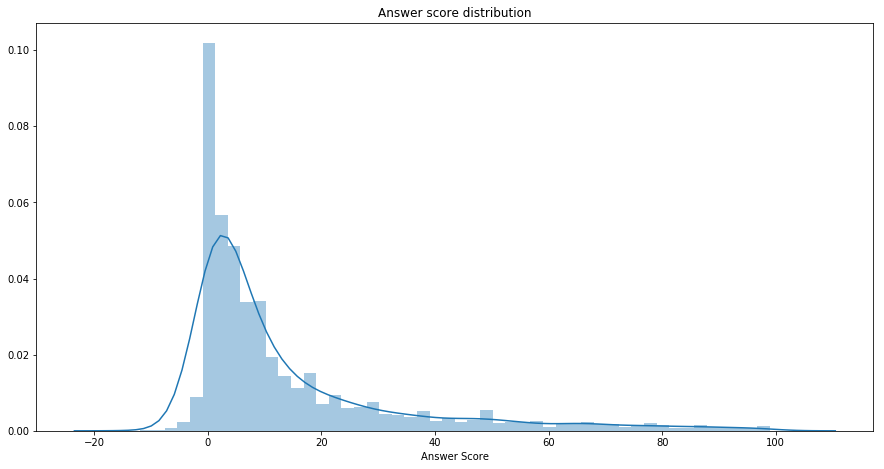

In [24]:
plt.figure(figsize=(15, 7.5))
sns.distplot(df['answer_score'][df['answer_score'] < 100])
_ = plt.title('Answer score distribution')
_ = plt.xlabel('Answer Score')

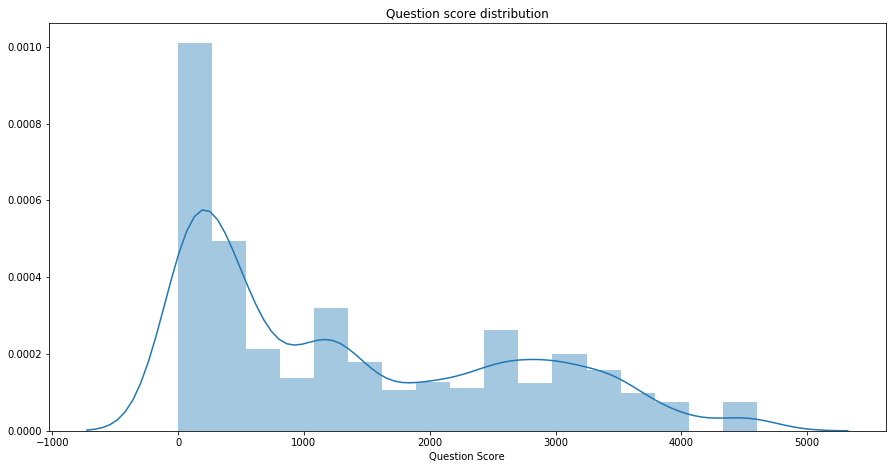

In [25]:
plt.figure(figsize=(15, 7.5))
sns.distplot(df['question_score'][df['question_score'] < 5000])
_ = plt.title('Question score distribution')
_ = plt.xlabel('Question Score')

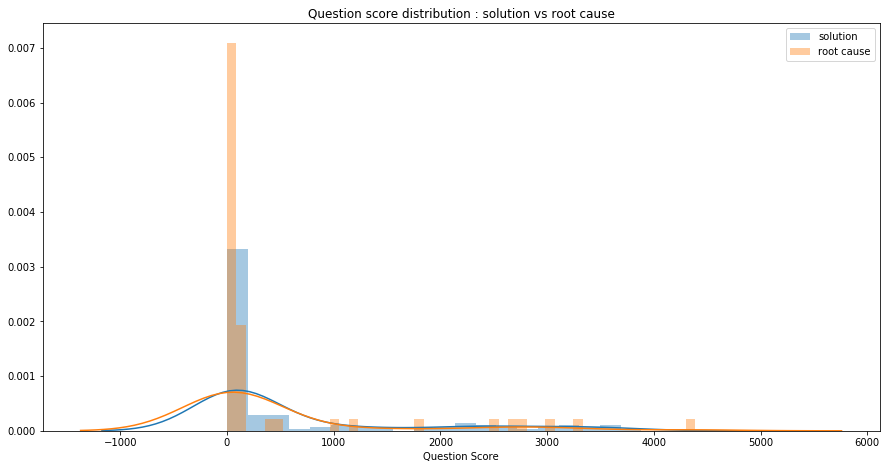

In [51]:
plt.figure(figsize=(15, 7.5))
_ = sns.distplot(df_annotated['question_score'][df_annotated['question_score'] < 5000][df_annotated['has_root_cause'] == 0], 
                 label='solution')
_ = sns.distplot(df_annotated['question_score'][df_annotated['question_score'] < 5000][df_annotated['has_root_cause'] == 1], 
                 label='root cause')
plt.legend()
_ = plt.title('Question score distribution : solution vs root cause')
_ = plt.xlabel('Question Score')

## Question / Answer length

In [52]:
df_annotated.head()

,question_id,answer_id,what_start,which_start,how_start,why_start,len_question,len_question_body,len_answer,nb_strong_tags_question,nb_code_tags_question,nb_href_tags_question,nb_hr_tags_question,nb_blockquote_tags_question,nb_strong_tags_answer,nb_code_tags_answer,nb_href_tags_answer,nb_hr_tags_answer,nb_blockquote_tags_answer,nb_return_carriage_question,nb_return_carriage_answer,answer_score,question_score,question_view,ratio_score1,ratio_score2,time_difference,has_root_cause
0,58700451,58710700,0,0,0,0,45,3077,1044,1,6,0,0,0,1,3,1,0,0,70,26,1,1,374,1.000000,0.002674,55692,0
1,58700451,58772798,0,0,0,0,45,3077,237,1,6,0,0,0,0,0,0,0,0,70,1,1,1,374,1.000000,0.002674,343255,0
2,38987,26853961,0,0,1,0,55,650,14517,0,5,0,0,0,5,60,14,0,6,14,312,5105,4386,1694572,1.163931,0.003013,195316038,1
3,136097,1669524,0,0,0,0,47,320,3421,0,2,2,0,0,2,36,1,0,0,1,83,2982,3378,736606,0.882771,0.004048,34899111,0
4,53513,53522,0,0,1,0,34,136,246,0,2,0,0,0,0,2,1,0,0,6,5,5070,3235,2563851,1.567233,0.001977,474,0


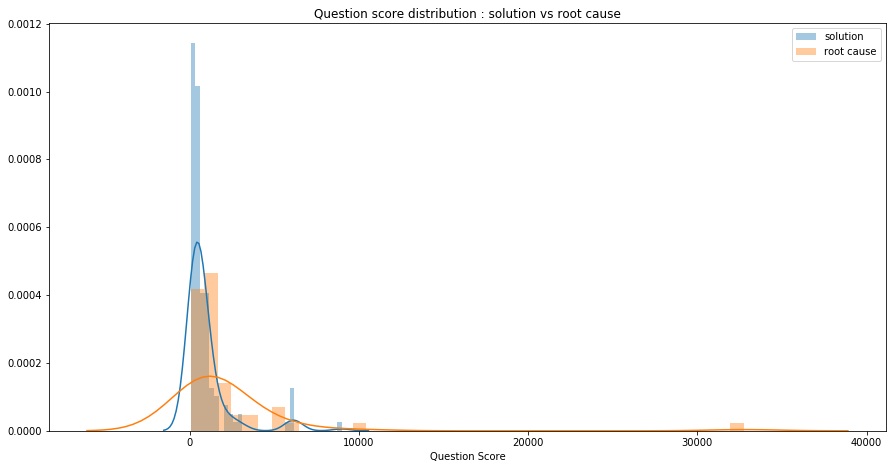

In [54]:
plt.figure(figsize=(15, 7.5))
_ = sns.distplot(df_annotated['len_question_body'][df_annotated['has_root_cause'] == 0], 
                 label='solution')
_ = sns.distplot(df_annotated['len_question_body'][df_annotated['has_root_cause'] == 1], 
                 label='root cause')
plt.legend()
_ = plt.title('Question length distribution : solution vs root cause')
_ = plt.xlabel('Question Length')

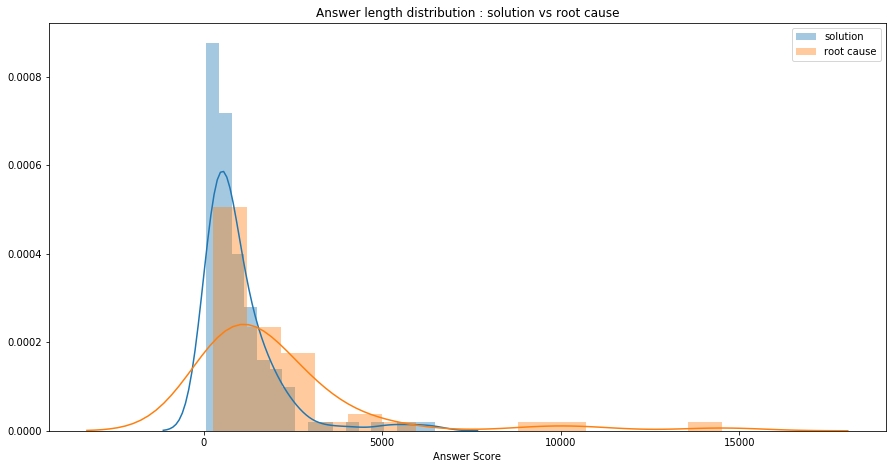

In [57]:
plt.figure(figsize=(15, 7.5))
_ = sns.distplot(df_annotated['len_answer'][df_annotated['has_root_cause'] == 0], 
                 label='solution')
_ = sns.distplot(df_annotated['len_answer'][df_annotated['has_root_cause'] == 1], 
                 label='root cause')
plt.legend()
_ = plt.title('Answer length distribution : solution vs root cause')
_ = plt.xlabel('Answer Score')

Text(376.77500000000003, 0.5, '')

<Figure size 1080x540 with 0 Axes>

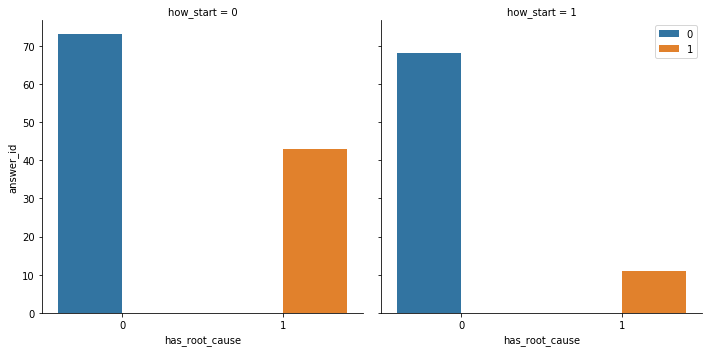

In [93]:
tmp = df_annotated[['answer_id', 'how_start', 'has_root_cause']].groupby(['how_start', 'has_root_cause']).count()
tmp.reset_index(inplace=True)
plt.figure(figsize=(15, 7.5))
sns.catplot(x='has_root_cause', y='answer_id', data=tmp, kind='bar', col='how_start', hue='has_root_cause')
plt.legend()
plt.ylabel('')

## Feature reduction analysis

### PCA

In [97]:
pca_transform = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df[~df['answer_id'].isnull()].drop(['question_id', 'has_root_cause', 'answer_id'], axis=1)))

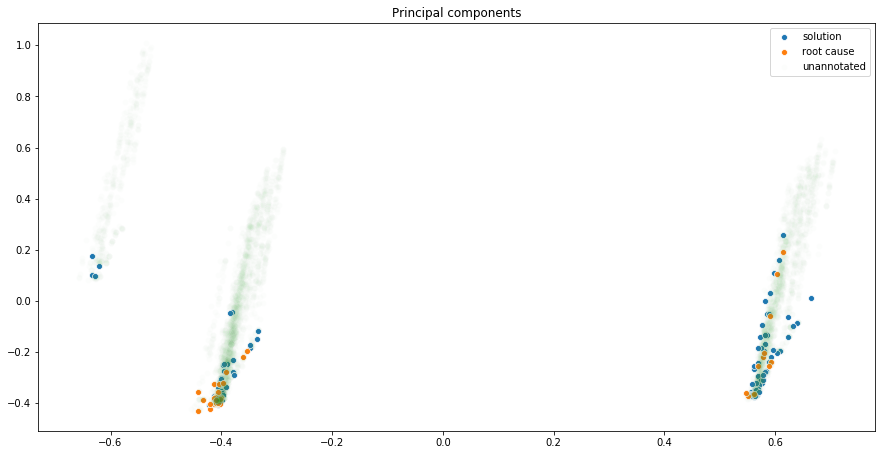

In [125]:
plt.figure(figsize=(15, 7.5))
sns.scatterplot(x=pca_transform[:, 0][df['has_root_cause'].values == 0], 
                y=pca_transform[:, 1][df['has_root_cause'].values == 0], 
                label='solution')

sns.scatterplot(x=pca_transform[:, 0][df['has_root_cause'].values == 1], 
                y=pca_transform[:, 1][df['has_root_cause'].values == 1], 
                label='root cause')

sns.scatterplot(x=pca_transform[:, 0][df['has_root_cause'].values == -1], 
                y=pca_transform[:, 1][df['has_root_cause'].values == -1], alpha=0.01,
                label='unannotated')
_ = plt.title('Principal components')

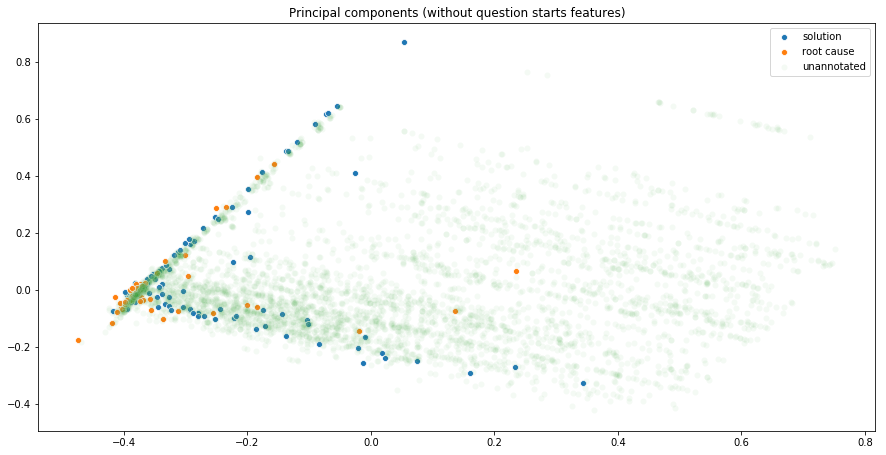

In [128]:
pca_transform = PCA(n_components=2)\
                 .fit_transform(MinMaxScaler()\
                 .fit_transform(df.drop(['question_id', 
                                         'answer_id', 
                                         'what_start', 
                                         'which_start', 
                                         'how_start',
                                         'why_start',
                                         'has_root_cause'], axis=1)))

plt.figure(figsize=(15, 7.5))
sns.scatterplot(x=pca_transform[:, 0][df['has_root_cause'].values == 0], 
                y=pca_transform[:, 1][df['has_root_cause'].values == 0], 
                label='solution')

sns.scatterplot(x=pca_transform[:, 0][df['has_root_cause'].values == 1], 
                y=pca_transform[:, 1][df['has_root_cause'].values == 1], 
                label='root cause')

sns.scatterplot(x=pca_transform[:, 0][df['has_root_cause'].values == -1], 
                y=pca_transform[:, 1][df['has_root_cause'].values == -1], alpha=0.05,
                label='unannotated')
_ = plt.title('Principal components (without question starts features)')

## TSNE

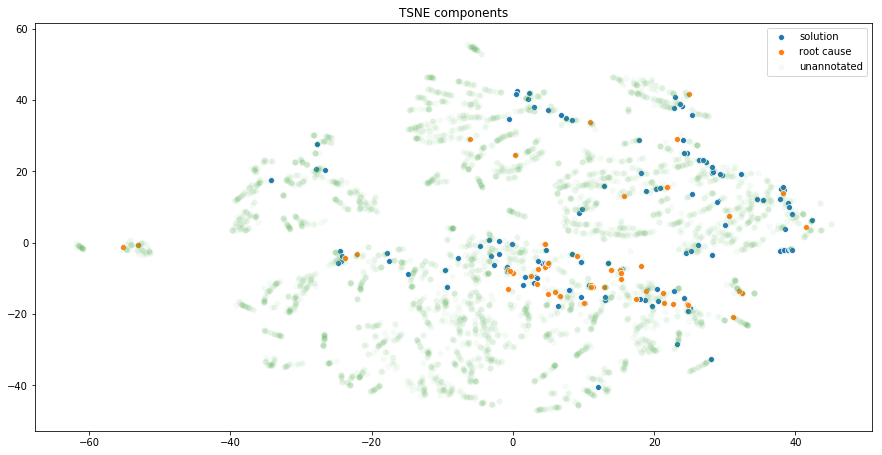

In [138]:
tsne_transform = TSNE(n_jobs=4).fit_transform(MinMaxScaler().fit_transform(df.drop(['question_id', 
                                                                                    'has_root_cause',
                                                                                    'answer_id'], axis=1)))

plt.figure(figsize=(15, 7.5))
sns.scatterplot(x=tsne_transform[:, 0][df['has_root_cause'].values == 0], 
                y=tsne_transform[:, 1][df['has_root_cause'].values == 0], 
                label='solution')

sns.scatterplot(x=tsne_transform[:, 0][df['has_root_cause'].values == 1], 
                y=tsne_transform[:, 1][df['has_root_cause'].values == 1], 
                label='root cause')

sns.scatterplot(x=tsne_transform[:, 0][df['has_root_cause'].values == -1], 
                y=tsne_transform[:, 1][df['has_root_cause'].values == -1], alpha=0.05,
                label='unannotated')

_ = plt.title('TSNE components')

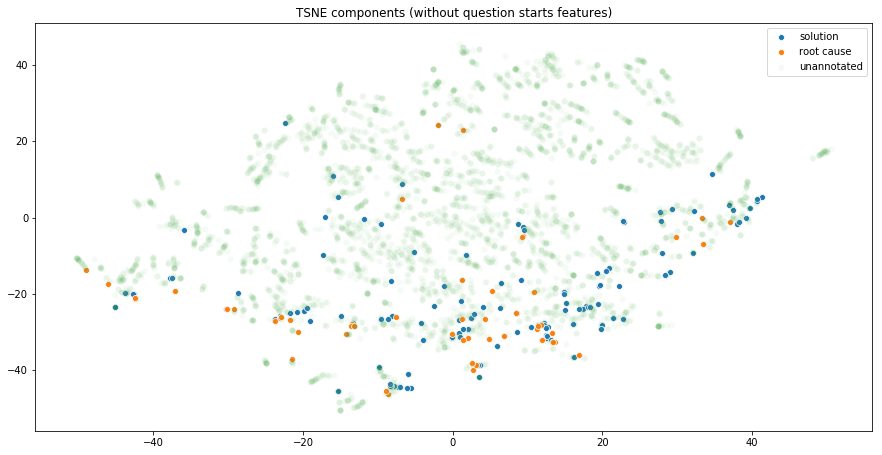

In [139]:
tsne_transform = TSNE(n_jobs=4).fit_transform(MinMaxScaler().fit_transform(df.drop(['question_id', 
                                                                                    'has_root_cause',
                                                                                    'what_start', 
                                                                                    'which_start', 
                                                                                    'how_start',
                                                                                    'why_start',
                                                                                    'answer_id'], axis=1)))

plt.figure(figsize=(15, 7.5))
sns.scatterplot(x=tsne_transform[:, 0][df['has_root_cause'].values == 0], 
                y=tsne_transform[:, 1][df['has_root_cause'].values == 0], 
                label='solution')

sns.scatterplot(x=tsne_transform[:, 0][df['has_root_cause'].values == 1], 
                y=tsne_transform[:, 1][df['has_root_cause'].values == 1], 
                label='root cause')

sns.scatterplot(x=tsne_transform[:, 0][df['has_root_cause'].values == -1], 
                y=tsne_transform[:, 1][df['has_root_cause'].values == -1], alpha=0.05,
                label='unannotated')
_ = plt.title('TSNE components (without question starts features)')